In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data  =  pd.read_csv("C:\\Users\\WELCOMES\\Downloads\\heart_disease_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns



In [3]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [4]:
data  =  pd.read_csv("C:\\Users\\WELCOMES\\Downloads\\heart_disease_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
cleaned_data = data.drop (columns = ['age'], axis = '1')
cleaned_data.head ()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
cleaned_data.describe ()


,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

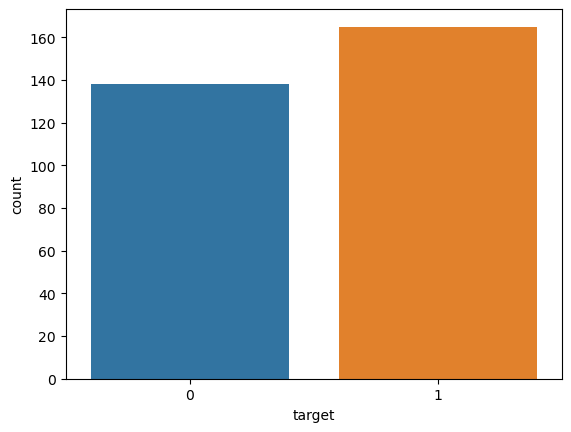

In [14]:
sns.countplot (x = 'target',data = cleaned_data)

<AxesSubplot:xlabel='target', ylabel='count'>

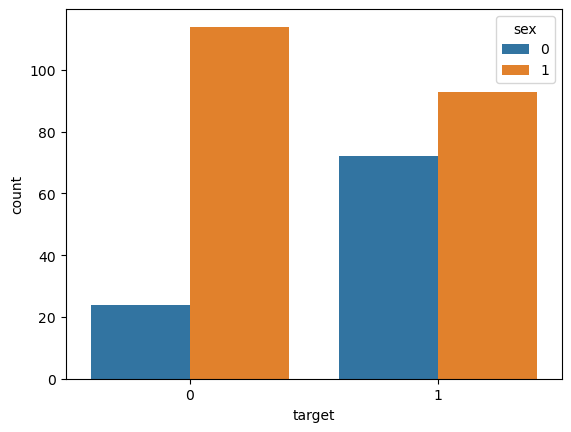

In [15]:
sns.countplot (x = 'target', hue = 'sex', data = cleaned_data)

<AxesSubplot:>

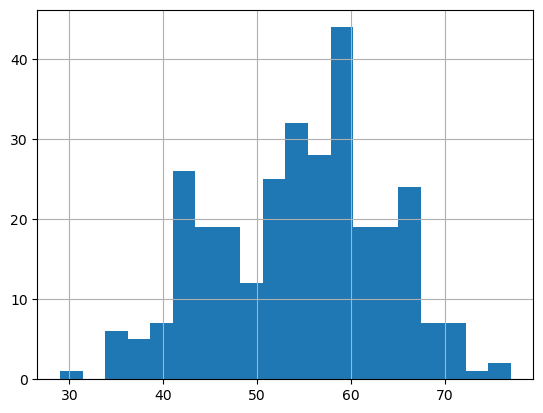

In [16]:
data ['age'].hist(bins = 20)

In [17]:
age_category = []

In [18]:
for i in range (0, len (data ['target'])):
    if cleaned_data ['target'][i] == 1:
        age_category.append ('A');
    
    else:
        age_category.append ('B');

In [19]:
age_data_frame = pd.DataFrame (data = age_category , columns = ['AgeCategory'])
argumented_data_set = pd.concat([cleaned_data, age_data_frame], axis = 1)
argumented_data_set.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,A
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,A
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,A
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,A
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,A


<AxesSubplot:xlabel='target', ylabel='count'>

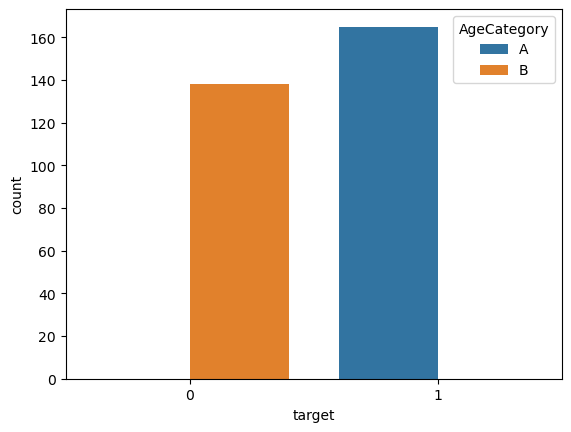

In [20]:
sns.countplot (x = 'target' , hue = 'AgeCategory' , data = argumented_data_set)

<AxesSubplot:>

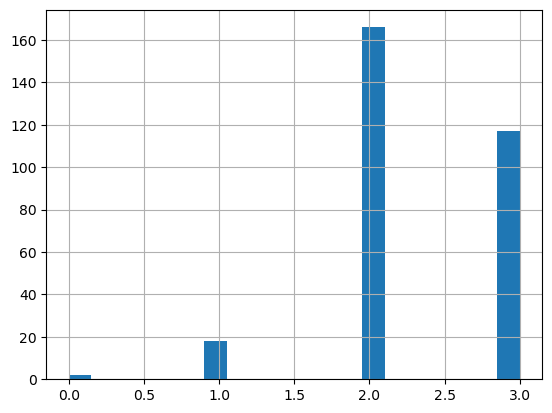

In [21]:
data ['thal'].hist(bins = 20)

<AxesSubplot:>

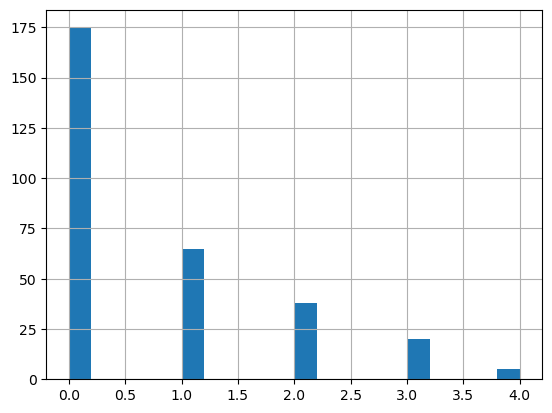

In [22]:
data ['ca'].hist(bins = 20)

<AxesSubplot:>

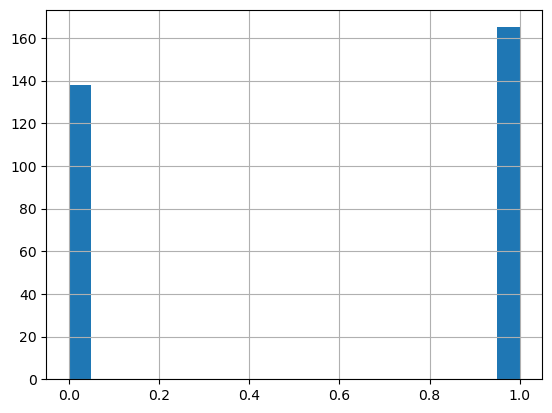

In [23]:
data ['target'].hist(bins = 20)

<AxesSubplot:>

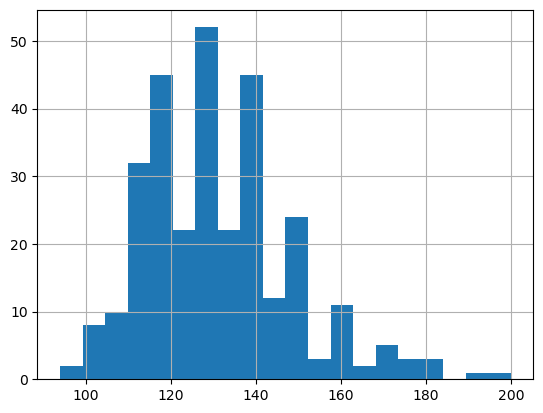

In [24]:
data ['trestbps'].hist(bins = 20)

<AxesSubplot:>

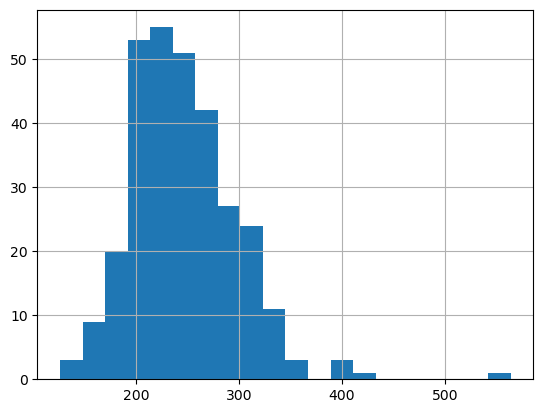

In [25]:
data ['chol'].hist(bins = 20)

<AxesSubplot:>

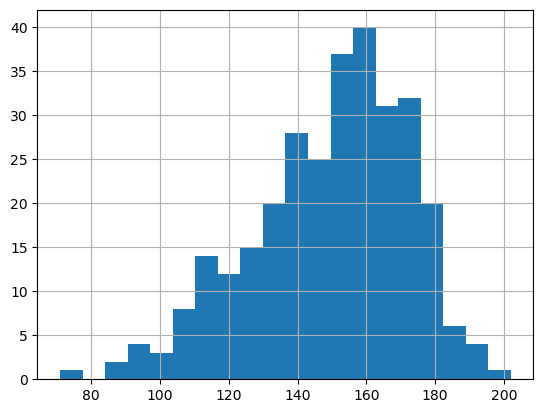

In [26]:
data ['thalach'].hist(bins = 20)

<AxesSubplot:>

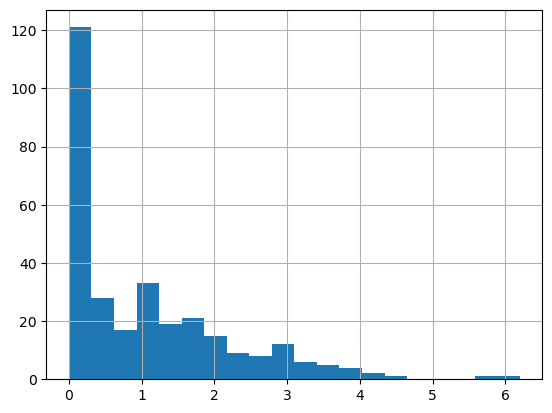

In [27]:
data ['oldpeak'].hist(bins = 20)

<AxesSubplot:>

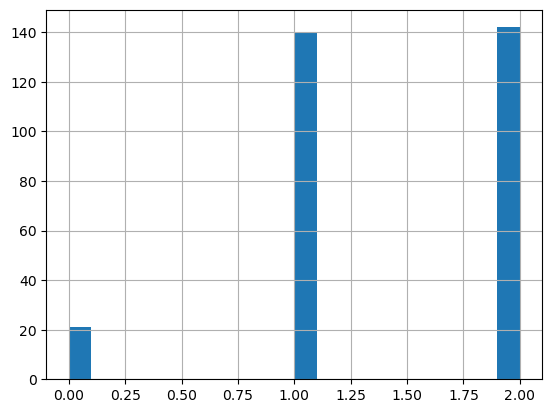

In [28]:
data ['slope'].hist(bins = 20)

<AxesSubplot:>

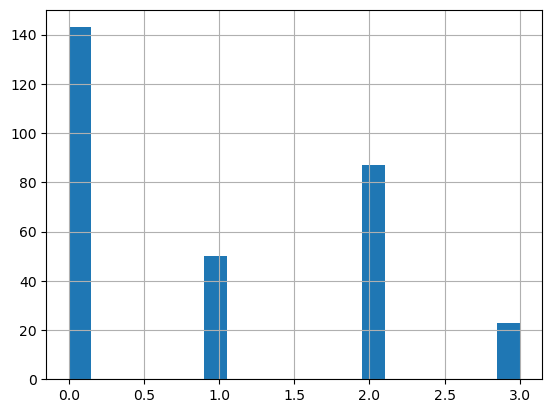

In [29]:
data ['cp'].hist(bins = 20)